<a href="https://colab.research.google.com/github/Sifat-1/CNN/blob/main/UthsoCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/uthsoboshu/ugbabsirbengprojdtaset.zip' -d '/content/sample_data/d2'

Streaming output truncated to the last 5000 lines.
  inflating: /content/sample_data/d2/ugbabsirbengprojdtaset/mynewbendgit_traindata/nipu_dgt_7__1725.tif  
  inflating: /content/sample_data/d2/ugbabsirbengprojdtaset/mynewbendgit_traindata/nipu_dgt_7__1726.tif  
  inflating: /content/sample_data/d2/ugbabsirbengprojdtaset/mynewbendgit_traindata/nipu_dgt_7__1727.tif  
  inflating: /content/sample_data/d2/ugbabsirbengprojdtaset/mynewbendgit_traindata/nipu_dgt_7__1728.tif  
  inflating: /content/sample_data/d2/ugbabsirbengprojdtaset/mynewbendgit_traindata/nipu_dgt_7__1729.tif  
  inflating: /content/sample_data/d2/ugbabsirbengprojdtaset/mynewbendgit_traindata/nipu_dgt_7__173.tif  
  inflating: /content/sample_data/d2/ugbabsirbengprojdtaset/mynewbendgit_traindata/nipu_dgt_7__1730.tif  
  inflating: /content/sample_data/d2/ugbabsirbengprojdtaset/mynewbendgit_traindata/nipu_dgt_7__1731.tif  
  inflating: /content/sample_data/d2/ugbabsirbengprojdtaset/mynewbendgit_traindata/nipu_dgt_7__1732.ti

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Activation, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

In [ ]:
from keras import optimizers
from keras.models import Sequential
from keras.layers import Activation,Input, Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.models import Model
#from keras.preprocessing.image import ImageDataGenerator
#from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

import tensorflow as tf
from tensorflow.python.tools import freeze_graph
from tensorflow.python.tools import optimize_for_inference_lib
from keras.optimizers import *
from keras.utils import np_utils

import numpy as np
import matplotlib.pyplot as plt
#import matplotlib
import os
import theano
from PIL import Image
from numpy import *
# SKLEARN
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [ ]:
path='/content/sample_data/d2/ugbabsirbengprojdtaset/mynewbendgit_testdata'
images=[]
classNo=[]
testRatio=0.2
valRatio=0.2
imgDimension=(28,28,3)

4000
[0 0 0 ... 1 1 1]


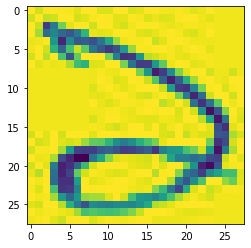

In [ ]:
img_rows , img_cols = 28 , 28


listing = os.listdir(path)

num_samples =size(listing)
print(num_samples)

for file in listing:
    im= Image.open(path + '/' + file)
    img = im.resize ((img_rows,img_cols))
    gray = img.convert('L')

    gray.save(path + '/' + file, "JPEG" )

imlist= os.listdir(path)
im1 =array(Image.open('/content/sample_data/d2/ugbabsirbengprojdtaset/mynewbendgit_testdata' + '/' + imlist[0]))



immatrix=array ([array(Image.open('/content/sample_data/d2/ugbabsirbengprojdtaset/mynewbendgit_testdata' + '/' + im2)).flatten()
                    for im2 in imlist] ,'f')

 #%%
m,n = immatrix.shape[0:2]

label = np.ones((num_samples,), dtype = int64 )
label[0:100]=0
label[401:500]=1
label[800:900]=2
label[1201:1300]=3
label[1601:1700]=4
label[2001:2100]=5
label[2401:2500]=6
label[2801:2900]=7
label[3201:3300]=8
label[3601:3700]=9
print(label)
data,Label = shuffle(immatrix,label,random_state=2)
train_data = [data,Label]
(X, y) = (train_data[0],train_data[1])

plt.imshow(data[67].reshape(28,28))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print(X_train,y_train.shape)
import matplotlib.pyplot as plt

plt.imshow(immatrix[16].reshape(img_rows,img_cols))
plt.imshow(immatrix[16].reshape(img_rows,img_cols),cmap='gray')
print (train_data[0].shape)
print (train_data[1].shape)

In [ ]:
y_train[0]

1

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
X_train /= 255
X_test /= 255
print('x_train shape:', X_train.shape)
print('Number of images in X_train', X_train.shape[0])
print('Number of images in X_test', X_test.shape[0])

x_train shape: (3200, 28, 28, 1)
Number of images in X_train 3200
Number of images in X_test 800


In [ ]:
# Importing the required Keras modules containing model and layers

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras import utils as np_utils
import keras
import keras.utils
from keras import utils as np_utils
from keras.layers import Dense
from keras.regularizers import l2
from keras.layers import Conv2D
# Creating a Sequential Model and adding the layers
model = Sequential()

model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))
print(model.summary())



Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 13, 13, 28)        0         
_________________________________________________________________
flatten_17 (Flatten)         (None, 4732)              0         
_________________________________________________________________
dense_37 (Dense)             (None, 128)               605824    
_________________________________________________________________
dropout_13 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 10)                1290      
Total params: 607,394
Trainable params: 607,394
Non-trainable params: 0
_______________________________________________

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model=model.fit(x=X_train,y=y_train, epochs=20)

Epoch 1/20
100/100 [==============================] - 3s 22ms/step - loss: 0.2016 - accuracy: 0.9328
Epoch 2/20
100/100 [==============================] - 2s 22ms/step - loss: 0.1545 - accuracy: 0.9534
Epoch 3/20
100/100 [==============================] - 2s 23ms/step - loss: 0.1340 - accuracy: 0.9569
Epoch 4/20
100/100 [==============================] - 2s 22ms/step - loss: 0.1137 - accuracy: 0.9634
Epoch 5/20
100/100 [==============================] - 2s 21ms/step - loss: 0.1025 - accuracy: 0.9678
Epoch 6/20
100/100 [==============================] - 2s 21ms/step - loss: 0.0952 - accuracy: 0.9694
Epoch 7/20
100/100 [==============================] - 2s 22ms/step - loss: 0.0823 - accuracy: 0.9791
Epoch 8/20
100/100 [==============================] - 2s 22ms/step - loss: 0.0744 - accuracy: 0.9803
Epoch 9/20
100/100 [==============================] - 2s 22ms/step - loss: 0.0814 - accuracy: 0.9737
Epoch 10/20
100/100 [==============================] - 2s 22ms/step - loss: 0.0701 - accura

In [ ]:
model.evaluate(X_test, y_test)

25/25 [==============================] - 0s 7ms/step - loss: 3.6513 - accuracy: 0.7200


[3.6512930393218994, 0.7200000286102295]

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model=model.fit(x=X_train,y=y_train, epochs=2000)

Epoch 1/2000
100/100 [==============================] - 7s 58ms/step - loss: 1.4450 - accuracy: 0.7809
Epoch 2/2000
100/100 [==============================] - 6s 58ms/step - loss: 1.2129 - accuracy: 0.7844
Epoch 3/2000
100/100 [==============================] - 6s 58ms/step - loss: 1.1301 - accuracy: 0.7844
Epoch 4/2000
100/100 [==============================] - 6s 58ms/step - loss: 1.0969 - accuracy: 0.7844
Epoch 5/2000
100/100 [==============================] - 6s 57ms/step - loss: 1.0475 - accuracy: 0.7844
Epoch 6/2000
100/100 [==============================] - 6s 58ms/step - loss: 1.0206 - accuracy: 0.7844
Epoch 7/2000
100/100 [==============================] - 6s 57ms/step - loss: 0.9816 - accuracy: 0.7844
Epoch 8/2000
100/100 [==============================] - 6s 58ms/step - loss: 0.9402 - accuracy: 0.7844
Epoch 9/2000
100/100 [==============================] - 6s 58ms/step - loss: 0.8963 - accuracy: 0.7856
Epoch 10/2000
100/100 [==============================] - 6s 59ms/step - l

In [ ]:
model.evaluate(X_test, y_test)

25/25 [==============================] - 1s 15ms/step - loss: 7.5036 - accuracy: 0.7312


[7.503623008728027, 0.731249988079071]

1


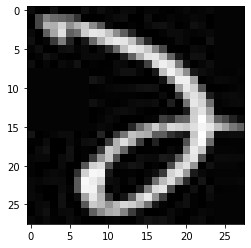

In [ ]:
image_index = 332

plt.imshow(X_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(X_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

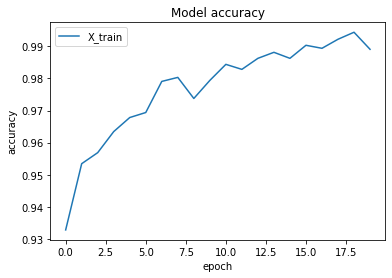

In [ ]:
import matplotlib.pyplot as plt


def plot_hist(model):
    plt.plot(Model.history["accuracy"])



    plt.title("Model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["X_train", "validation"], loc="upper left")
    plt.show()
plot_hist(Model)

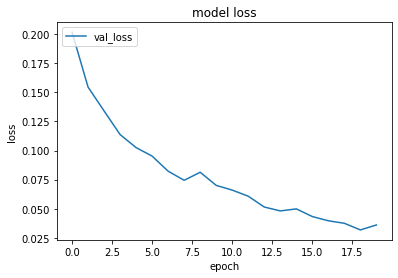

In [ ]:
def plot_hist(Model):
    #plt.plot(Model.history["accuracy"])

    plt.plot(Model.history["loss"])
    plt.title("model loss")
    plt.ylabel("loss")
    plt.xlabel("epoch")
    plt.legend(["val_loss","loss"], loc="upper left")
    plt.show()
plot_hist(Model)

4000
[0 0 0 ... 1 1 1]


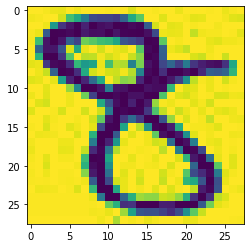

In [ ]:
img_rows , img_cols = 28 , 28


listing = os.listdir(path)

num_samples =size(listing)
print(num_samples)

for file in listing:
    im= Image.open(path + '/' + file)
    img = im.resize ((img_rows,img_cols))
    gray = img.convert('L')

    gray.save(path + '/' + file, "JPEG" )

imlist= os.listdir(path)
im1 =array(Image.open('/content/sample_data/d2/ugbabsirbengprojdtaset/mynewbendgit_testdata' + '/' + imlist[0]))



immatrix=array ([array(Image.open('/content/sample_data/d2/ugbabsirbengprojdtaset/mynewbendgit_testdata' + '/' + im2)).flatten()
                    for im2 in imlist] ,'f')

 #%%
m,n = immatrix.shape[0:2]

label = np.ones((num_samples,), dtype = int64 )
label[0:100]=0
label[401:500]=1
label[800:900]=2
label[1201:1300]=3
label[1601:1700]=4
label[2001:2100]=5
label[2401:2500]=6
label[2801:2900]=7
label[3201:3300]=8
label[3601:3700]=9
print(label)
data,Label = shuffle(immatrix,label,random_state=2)
train_data = [data,Label]
(X, y) = (train_data[0],train_data[1])

plt.imshow(data[67].reshape(28,28))

[[204. 230. 255. ... 247. 246. 246.]
 [245. 255. 255. ... 255. 255. 255.]
 [255. 255. 250. ... 255. 255. 255.]
 ...
 [255. 225. 255. ... 242. 245. 241.]
 [226. 227. 224. ... 224. 220. 218.]
 [186. 181. 250. ... 253. 246. 255.]] (3200,)
(4000, 784)
(4000,)


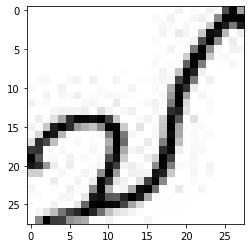

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print(X_train,y_train.shape)
import matplotlib.pyplot as plt

plt.imshow(immatrix[16].reshape(img_rows,img_cols))
plt.imshow(immatrix[16].reshape(img_rows,img_cols),cmap='gray')
print (train_data[0].shape)
print (train_data[1].shape)

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
X_train /= 255
X_test /= 255
print('x_train shape:', X_train.shape)
print('Number of images in X_train', X_train.shape[0])
print('Number of images in X_test', X_test.shape[0])

x_train shape: (3200, 28, 28, 1)
Number of images in X_train 3200
Number of images in X_test 800


In [ ]:
# Importing the required Keras modules containing model and layers

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras import utils as np_utils
import keras
import keras.utils
from keras import utils as np_utils
from keras.layers import Dense
from keras.regularizers import l2
from keras.layers import Conv2D
from keras.utils import np_utils
keras.utils.to_categorical()
# Creating a Sequential Model and adding the layers

AttributeError: ignored

In [ ]:
y_train = keras.utils.to_categorical()(y_train, num_samples)
y_val = keras.utils.np_utils(y_val, num_samples)
y_test = keras.utils.np_utils(y_test, num_samples)

TypeError: ignored

In [ ]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), padding='same',
                 activation='relu', use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(128, (3, 3), padding='same',  activation='relu', use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros'))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu', use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu', use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros'))
model.add(Conv2D(256, (3, 3),padding='same',  activation='relu', use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_samples, activation='softmax'))